# Gaussian Processes
## Part 1: Kernels and standard apprach versus robust
In this tutorial, we compare GPs for detrending time-series data.

We begin by loading a TESS light curve:

In [8]:
import numpy as np
from astropy.io import fits

def load_file(filename):
    """Loads a TESS *spoc* FITS file and returns TIME, PDCSAP_FLUX"""
    hdu = fits.open(filename)
    time = hdu[1].data['TIME']
    flux = hdu[1].data['PDCSAP_FLUX']
    flux[flux == 0] = np.nan
    return time, flux

print('Loading TESS data from archive.stsci.edu...')
path = 'https://archive.stsci.edu/hlsps/tess-data-alerts/'
filename = 'hlsp_tess-data-alerts_tess_phot_00077031414-s02_tess_v1_lc.fits'
time, flux = load_file(path + filename)

Loading TESS data from archive.stsci.edu...


To cut down on the runtime, we down-sample the data:

In [9]:
from transitleastsquares import resample
time, flux = resample(time, flux, factor=5)

We use wotan to detrend with two methods:

In [10]:
from wotan import flatten
flatten_lc1, trend_lc1 = flatten(time, flux, kernel_size=5, return_trend=True, method='gp', kernel='matern')
flatten_lc2, trend_lc2 = flatten(time, flux, kernel_size=2, return_trend=True, method='gp', kernel='squared_exp')

Segment 1 of 2
Segment 2 of 2
Segment 1 of 2
Segment 2 of 2


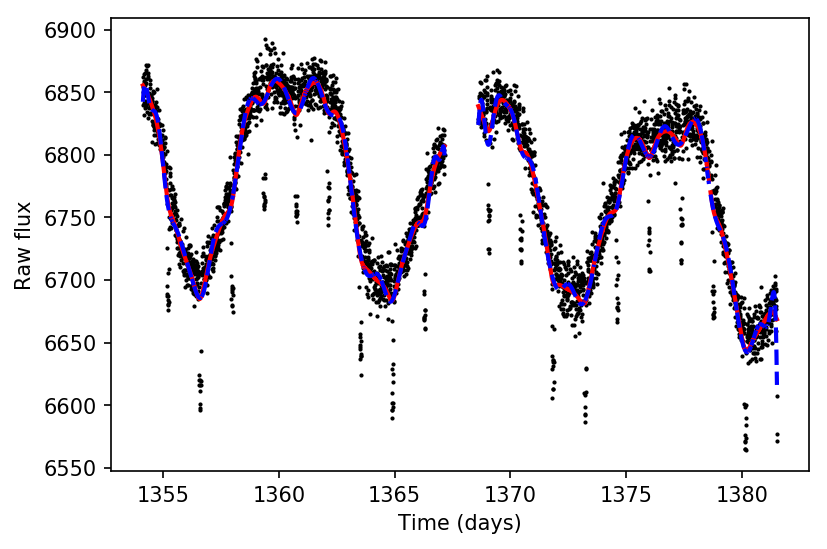

In [11]:
# Plot the result
import matplotlib.pyplot as plt
from matplotlib import rcParams; rcParams["figure.dpi"] = 150
plt.figure()
plt.scatter(time, flux, s=1, color='black')
plt.plot(time, trend_lc1, linewidth=2, color='red')
plt.plot(time, trend_lc2, linewidth=2, color='blue', linestyle='dashed')
plt.xlabel('Time (days)')
plt.ylabel('Raw flux');

A zoom shows that the GPs are affected by the transit dips:

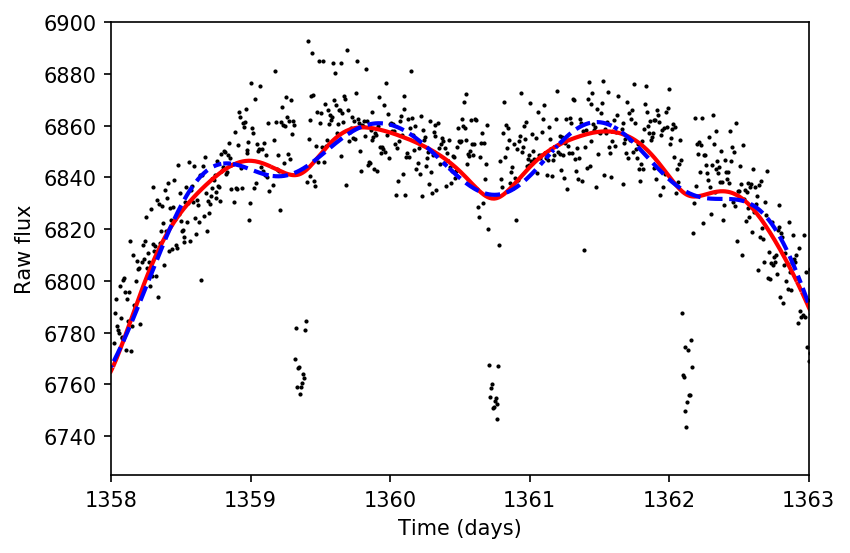

In [12]:
plt.figure()
plt.scatter(time, flux, s=1, color='black')
plt.plot(time, trend_lc1, linewidth=2, color='red')
plt.plot(time, trend_lc2, linewidth=2, color='blue', linestyle='dashed')
plt.xlim(1358, 1363)
plt.ylim(6725, 6900)
plt.xlabel('Time (days)')
plt.ylabel('Raw flux');

We can improve this issue by switching to an iterative clipping approach, where outliers beyond 2 sigma from the fitted trend are removed in each iteration, until convergence. We simply add ``robust=True`` as a parameter:

Segment 1 of 2
Iteration: 1 Rejected outliers: 75
Iteration: 2 Rejected outliers: 42
Iteration: 3 Rejected outliers: 21
Iteration: 4 Rejected outliers: 8
Iteration: 5 Rejected outliers: 2
Iteration: 6 Rejected outliers: 2
Iteration: 7 Rejected outliers: 1
Iteration: 8 Rejected outliers: 0
Converged.
Segment 2 of 2
Iteration: 1 Rejected outliers: 72
Iteration: 2 Rejected outliers: 37
Iteration: 3 Rejected outliers: 29
Iteration: 4 Rejected outliers: 11
Iteration: 5 Rejected outliers: 4
Iteration: 6 Rejected outliers: 2
Iteration: 7 Rejected outliers: 1
Iteration: 8 Rejected outliers: 1
Iteration: 9 Rejected outliers: 0
Converged.


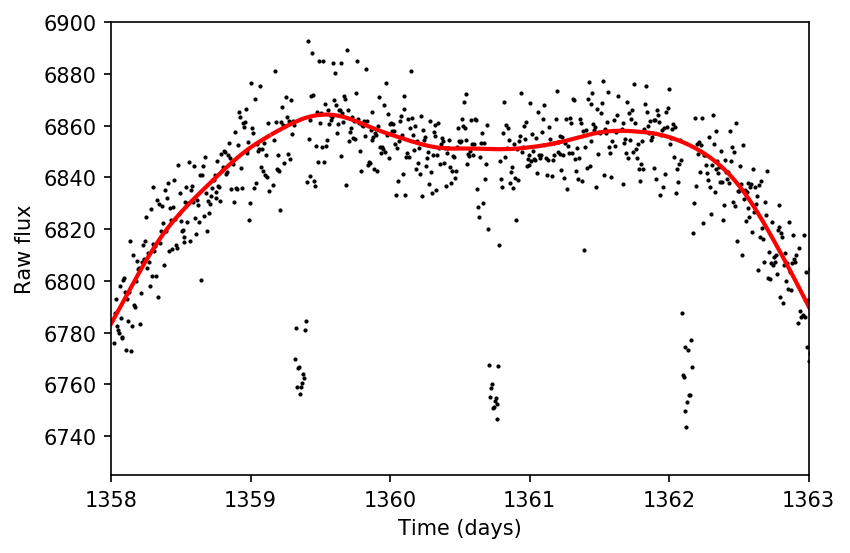

In [13]:
from wotan import flatten
flatten_lc1, trend_lc1 = flatten(
    time, flux, kernel_size=5, return_trend=True, method='gp', kernel='matern', robust=True)

plt.figure()
plt.scatter(time, flux, s=1, color='black')
plt.plot(time, trend_lc1, linewidth=2, color='red')
plt.xlim(1358, 1363)
plt.ylim(6725, 6900)
plt.xlabel('Time (days)')
plt.ylabel('Raw flux');

Much better!